In [10]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from jax import jit

In [4]:
def norm(X):
    X = X - X.mean(0)
    return X / X.std(0)

In [6]:
norm(jnp.array([ 3, 5, 2, 6, -4]))

Array([ 0.17149855,  0.7431605 , -0.11433242,  1.0289915 , -1.8293183 ],      dtype=float32)

(array([1., 0., 0., 0., 0., 0., 1., 1., 0., 2.]),
 array([-1.82931828, -1.54348731, -1.25765634, -0.97182536, -0.68599439,
        -0.40016341, -0.11433244,  0.17149854,  0.45732951,  0.74316049,
         1.02899146]),
 <BarContainer object of 10 artists>)

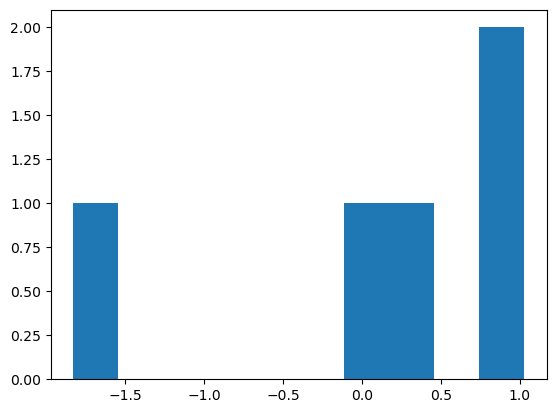

In [8]:
plt.hist(norm(jnp.array([ 3, 5, 2, 6, -4])))

In [11]:
@jit
def f(x, y):
  print("Running f():")
  print(f"  x = {x}")
  print(f"  y = {y}")
  result = jnp.dot(x + 1, y + 1)
  print(f"  result = {result}")
  return result

x = np.random.randn(3, 4)
y = np.random.randn(4)
f(x, y)

Running f():
  x = Traced<ShapedArray(float32[3,4])>with<DynamicJaxprTrace(level=1/0)>
  y = Traced<ShapedArray(float32[4])>with<DynamicJaxprTrace(level=1/0)>
  result = Traced<ShapedArray(float32[3])>with<DynamicJaxprTrace(level=1/0)>


Array([2.8895657 , 5.8330736 , 0.17194557], dtype=float32)

In [15]:
from jax import make_jaxpr

def f(x, y):
  return jnp.dot(x + 1, y + 1)

make_jaxpr(f)(x, y)

{ lambda ; a:f32[3,4] b:f32[4]. let
    c:f32[3,4] = add a 1.0
    d:f32[4] = add b 1.0
    e:f32[3] = dot_general[dimension_numbers=(([1], [0]), ([], []))] c d
  in (e,) }

array([[ 1.03490658, -1.2865554 ,  0.04049695,  0.33808799],
       [ 1.25284038, -0.23107895,  1.14371523,  1.13042315],
       [-2.01519276, -0.41319189, -0.2593057 ,  1.01438202]])

In [17]:

@jit
def f(x):
  return x.reshape(jnp.array(x.shape).prod())

x = jnp.ones((2, 3))
f(x)


TypeError: Shapes must be 1D sequences of concrete values of integer type, got [Traced<ShapedArray(int32[])>with<DynamicJaxprTrace(level=1/0)>].
If using `jit`, try using `static_argnums` or applying `jit` to smaller subfunctions.
The error occurred while tracing the function f at /tmp/ipykernel_31735/3478157833.py:1 for jit. This value became a tracer due to JAX operations on these lines:

  operation a:i32[2] = convert_element_type[new_dtype=int32 weak_type=False] b
    from line /tmp/ipykernel_31735/3478157833.py:3:19 (f)

In [18]:
@jit
def f(x):
  print(f"x = {x}")
  print(f"x.shape = {x.shape}")
  print(f"jnp.array(x.shape).prod() = {jnp.array(x.shape).prod()}")
  # comment this out to avoid the error:
  # return x.reshape(jnp.array(x.shape).prod())

f(x)

x = Traced<ShapedArray(float32[2,3])>with<DynamicJaxprTrace(level=1/0)>
x.shape = (2, 3)
jnp.array(x.shape).prod() = Traced<ShapedArray(int32[])>with<DynamicJaxprTrace(level=1/0)>


In [19]:
import jax
import jax.numpy as jnp

example_trees = [
    [1, 'a', object()],
    (1, (2, 3), ()),
    [1, {'k1': 2, 'k2': (3, 4)}, 5],
    {'a': 2, 'b': (2, 3)},
    jnp.array([1, 2, 3]),
]

# Let's see how many leaves they have:
for pytree in example_trees:
  leaves = jax.tree_util.tree_leaves(pytree)
  print(f"{repr(pytree):<45} has {len(leaves)} leaves: {leaves}")

[1, 'a', <object object at 0x7fc9c0c40c20>]   has 3 leaves: [1, 'a', <object object at 0x7fc9c0c40c20>]
(1, (2, 3), ())                               has 3 leaves: [1, 2, 3]
[1, {'k1': 2, 'k2': (3, 4)}, 5]               has 5 leaves: [1, 2, 3, 4, 5]
{'a': 2, 'b': (2, 3)}                         has 3 leaves: [2, 2, 3]
Array([1, 2, 3], dtype=int32)                 has 1 leaves: [Array([1, 2, 3], dtype=int32)]


In [20]:
list_of_lists = [
    [1, 2, 3],
    [1, 2],
    [1, 2, 3, 4]
]

In [21]:
jax.tree_map(lambda x: x**2, list_of_lists)

[[1, 4, 9], [1, 4], [1, 4, 9, 16]]